## Project 2025
### Programming and Scripting
Author : Finian Doonan


## Introduction
The Iris dataset is one of the most well known and widely used datasets in statistics and analysis. It was first introduced by the British biologist and statistician Ronald A. Fisher back in 1936, and it is regarded as a good starting point for data science and statistics since then.

### Library Imports for Data analysis

In [14]:
# Data manipulation
import numpy as np # For numerical operations
import pandas as pd # For data manipulation and analysis

# Machine Learning Library
import sklearn # For machine learning algorithms
from sklearn import datasets  # For loading datasets

# Plotting
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns  # Visualization library based on matplotlib
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

### References

https://archive.ics.uci.edu/dataset/53/iris

https://numpy.org/doc/stable/user/index.html

https://pandas.pydata.org/docs/user_guide/index.html

https://scikit-learn.org/stable/user_guide.html

https://matplotlib.org/stable/users/index.html

https://seaborn.pydata.org/index.html




### Import the Iris dataset

This code imports the pandas library as pd and reads the Iris dataset from the file path to a DataFrame named df. 

In [15]:
# Load the iris dataset.
df = pd.read_csv("iris_dataset/iris.data")

# Have a look.
df



,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


### Discussion  

This code imports the pandas library as pd and reads the Iris dataset from the file path to a ``DataFrame named df``. The Iris dataset containing measurements of 149 iris flowers from three different species: setosa, versicolor and virginica. The four features analysis in this dataset were: sepal length, sepal width, petal length, and petal width outline in the 5 columns.

### References

https://www.geeksforgeeks.org/python-basics-of-pandas-using-iris-dataset/

### Exploring the Data

In [16]:
# Describe the data set.
df.describe()

# look at the data.
df

# Look at the keys
df.keys()

# Rename columns to better names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# The species of iris
df['species']

# Shape
df['species'].shape

# The sepal length
df['sepal_length']

# The petal lenght
df['petal_length']

# the petal width
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.4
      ... 
144    2.3
145    1.9
146    2.0
147    2.3
148    1.8
Name: petal_width, Length: 149, dtype: float64

### Discussion

​This code block provides a basic overview of the Iris dataset using ``Pandas``. It starts by generating the summary statistics with ``df.describe()`` for data distribution. The dataset is then displayed in full using df and the column names are retrieved with ``df.keys()``. Then I rewrote the column names to be more unstandable 'sepal_length' and 'species'. Finally, the shape of the species column is determined using ``df['species'].shape``, displays the number of entries in the column.

### References

https://www.geeksforgeeks.org/pandas-rename-column/

https://www.w3resource.com/pandas/dataframe/dataframe-describe.php

https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html

### Summary Statistics

into

In [17]:
# Statistics
stats = df.describe().T[['mean', 'min', 'max', 'std']]
stats['median'] = df.median(numeric_only=True) # select only the numeric columns

# Print results
print(stats)

                  mean  min  max       std  median
sepal_length  5.848322  4.3  7.9  0.828594     5.8
sepal_width   3.051007  2.0  4.4  0.433499     3.0
petal_length  3.774497  1.0  6.9  1.759651     4.4
petal_width   1.205369  0.1  2.5  0.761292     1.3


### Discussion 

This code calculates basic statistics for each numerical feature in the Iris dataset using `pandas`. It computes the mean, minimum, maximum, standard deviation, and median for features like sepal length, sepal width, petal length, and petal width.

### References:

https://note.nkmk.me/en/python-pandas-describe/



### Data Visualization: Histograms

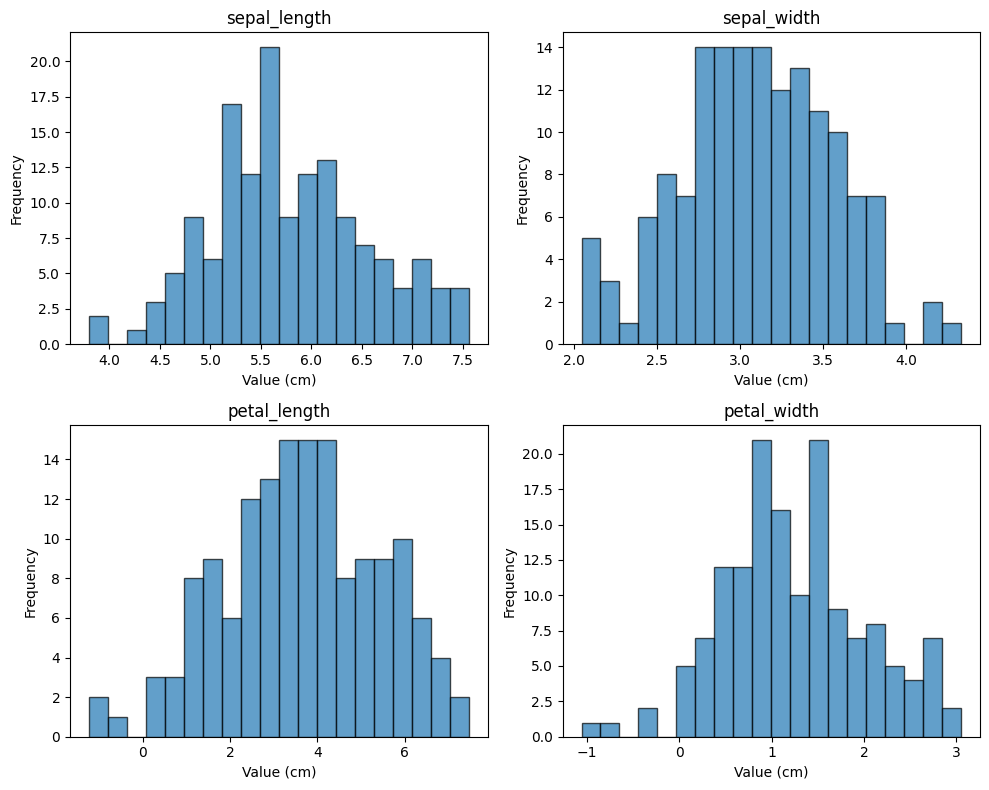

In [18]:
#  summary statistics
stats = {
    "sepal_length": np.random.normal(5.843333, 0.828066, 150),
    "sepal_width": np.random.normal(3.054000, 0.433594, 150),
    "petal_length": np.random.normal(3.758667, 1.764420, 150),
    "petal_width": np.random.normal(1.198667, 0.763161, 150)
}

# Plot histograms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

# create histogram for each feature
for idx, (feature, values) in enumerate(stats.items()):
    axes[idx].hist(values, bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(feature)
    axes[idx].set_xlabel("Value (cm)")
    axes[idx].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

### Discussion 

​The code creates data for each flower measurement sepal length, sepal width, petal length, and petal width using random numbers in ``NumPy's normal distribution`` function. It then draws histograms for each measurement to show how the values are spread out. This helps us understand the data's characteristics.

### References

https://sparkbyexamples.com/python/how-to-use-numpy-random-normal-in-python/

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?utm_source=chatgpt.com

### Data Visualization – Scatter Plot

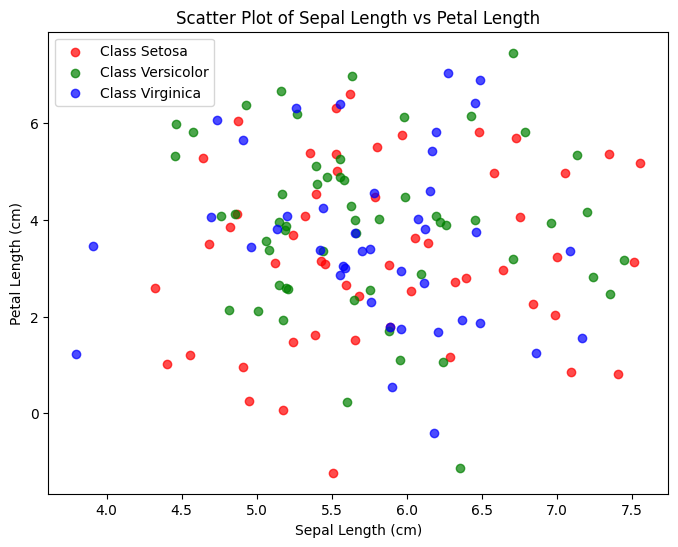

In [19]:
# Generate synthetic class labels with names
class_names = ["Setosa", "Versicolor", "Virginica"]
classes = np.random.choice(class_names, size=150)
colors = {'Setosa': 'r', 'Versicolor': 'g', 'Virginica': 'b'}

# Scatter plot of sepal_length vs petal_length
plt.figure(figsize=(8, 6))
for class_label in np.unique(classes):
    plt.scatter(
        stats["sepal_length"][classes == class_label],
        stats["petal_length"][classes == class_label],
        color=colors[class_label],
        label=f'Class {class_label}',
        alpha=0.7
    )

# Add labels and legend
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.legend()
plt.show()

### Discussion 

​The provided code creates a scatter plot to display the relationship between sepal length and petal length in the Iris dataset. It begins by generating synthetic class labels Setosa, Versicolor and Virginica using ``NumPy's random.choice`` function . Each class is assigned a distinct color: red for Setosa, green for Versicolor, and blue for Virginica. Using ``Matplotlib``, the code plots sepal length on the x-axis and petal length on the y-axis, with each point colored according to its class. A legend is added to identify each class This plot provides understanding of the distribution of the class.

### References

https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html?utm_source=chatgpt.com

https://how2matplotlib.com/how-to-add-a-legend-to-a-scatter-plot-in-matplotlib.html

https://stackoverflow.com/questions/47006268/scatter-plot-with-color-label-and-legend-specified-by-c-option


### Data Visualization – Scatter Plot with Linear Regression

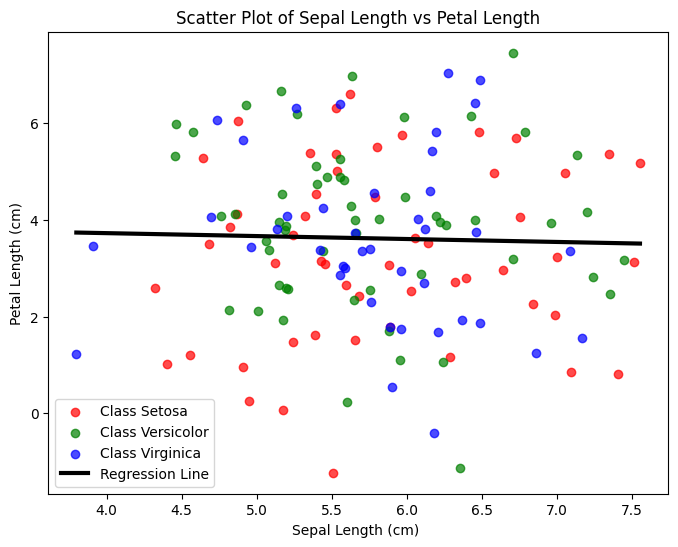

In [20]:
# Scatter plot of sepal_length vs petal_length
plt.figure(figsize=(8, 6))
for class_label in np.unique(classes):
    plt.scatter(
        stats["sepal_length"][classes == class_label],
        stats["petal_length"][classes == class_label],
        color=colors[class_label],
        label=f'Class {class_label}',
        alpha=0.7
    )
# Fit a regression line using numpy.polyfit
x = stats["sepal_length"]
y = stats["petal_length"]

# Fit a regression line
coefficients = np.polyfit(x, y, 1)

# Create a polynomial object
polynomial = np.poly1d(coefficients)
x_line = np.linspace(min(x), max(x), 100)
y_line = polynomial(x_line)

# Plot the regression line
plt.plot(x_line, y_line, color='k', linestyle='-', linewidth=3, label='Regression Line')

# Add labels and title
plt.xlabel("Sepal Length (cm) ")
plt.ylabel("Petal Length (cm)")
plt.title("Scatter Plot of Sepal Length vs Petal Length")
plt.legend()
plt.show()

### Discussion 

The code generates a scatter plot of sepal length versus petal length, with each point colored according to its assigned iris species. a straight line is added using ``NumPy's polyfit`` function, which calculates the best-fitting line by minimizing the squared differences between the observed and predicted values. This regression line is then plotted on the scatter plot using ``Matplotlib``, showing the best visual representation of the linear relationship between sepal length and petal length.

### References

https://sqlpey.com/python/how-to-implement-linear-regression-with-matplotlib-and-numpy/

https://www.geeksforgeeks.org/linear-regression-python-implementation/


### Data Visualization – Box Plots

intro

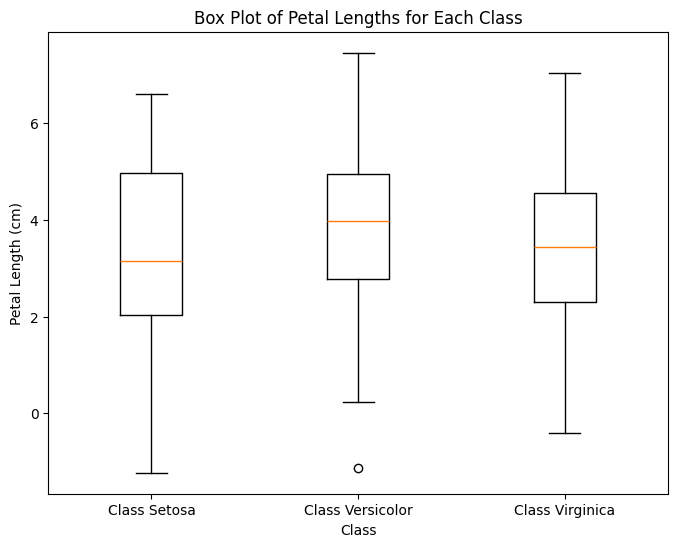

In [21]:
# Create box-plots for petal lengths of each class
plt.figure(figsize=(8, 6)) 

# Extract petal lengths for each class
petal_lengths_by_class = [stats["petal_length"][classes == class_label] for class_label in np.unique(classes)]

# Create box-plots
plt.boxplot(petal_lengths_by_class, tick_labels=[f'Class {c}' for c in np.unique(classes)])


# Add labels
plt.xlabel("Class")
plt.ylabel("Petal Length (cm)")
plt.title("Box Plot of Petal Lengths for Each Class")
plt.show()

### Discussion 

​This code generates box plots to visualize the distribution of petal lengths for each iris species Setosa, Versicolor, and Virginica. Using ``NumPy``  it groups the petal length data according to species. `Matplotlib` then creates box plots for each group and displays the median and potential outliers. This visualization helps in comparing the spread and differences of petal lengths across different species helping distinguishing useful characteristics.

### References

https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/

https://www.geeksforgeeks.org/box-plot/

### Data Visualization – Heatmap using Seaborn

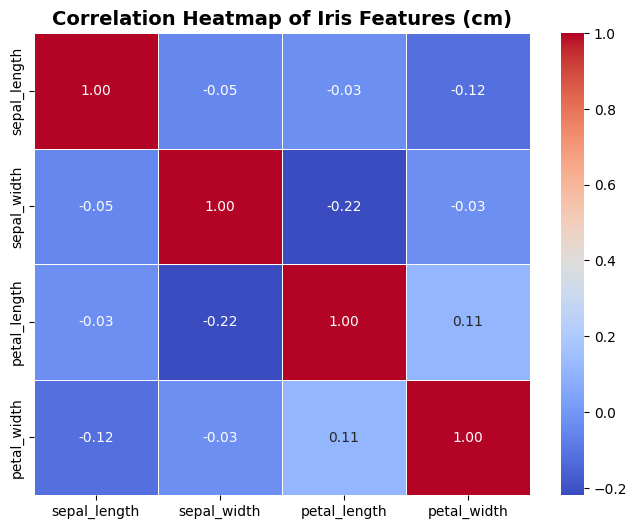

In [22]:
# Convert to DataFrame
df = pd.DataFrame(stats)

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Iris Features (cm)", fontsize=14, fontweight='bold')

# Show plot
plt.show()

### References

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

https://pytutorial.com/python-seaborn-heatmap-tutorial-data-visualization/

https://www.pickl.ai/blog/exploring-what-is-pandas-dataframe-corr-method-types-and-working/

https://www.delftstack.com/howto/seaborn/correlation-heatplot-seaborn-python/

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

### Discussion

Using the ``pandas`` library, it first converts the data into a structured table called a DataFrame. Then, it calculates the correlation matrix with the ``corr()`` method, which shows how strongly pairs of features are related using values close to 1 or -1 to indicate the strength of the relationships, while values near 0 suggest weak or no relationship. To visualize these relationships, the seaborn library's ``heatmap()`` function is used to create a color-coded grid, where each cell's color intensity reflects the strength of the correlation. This visual tool helps quickly identify which features are closely relate

### Data Visualization – Pair Plot

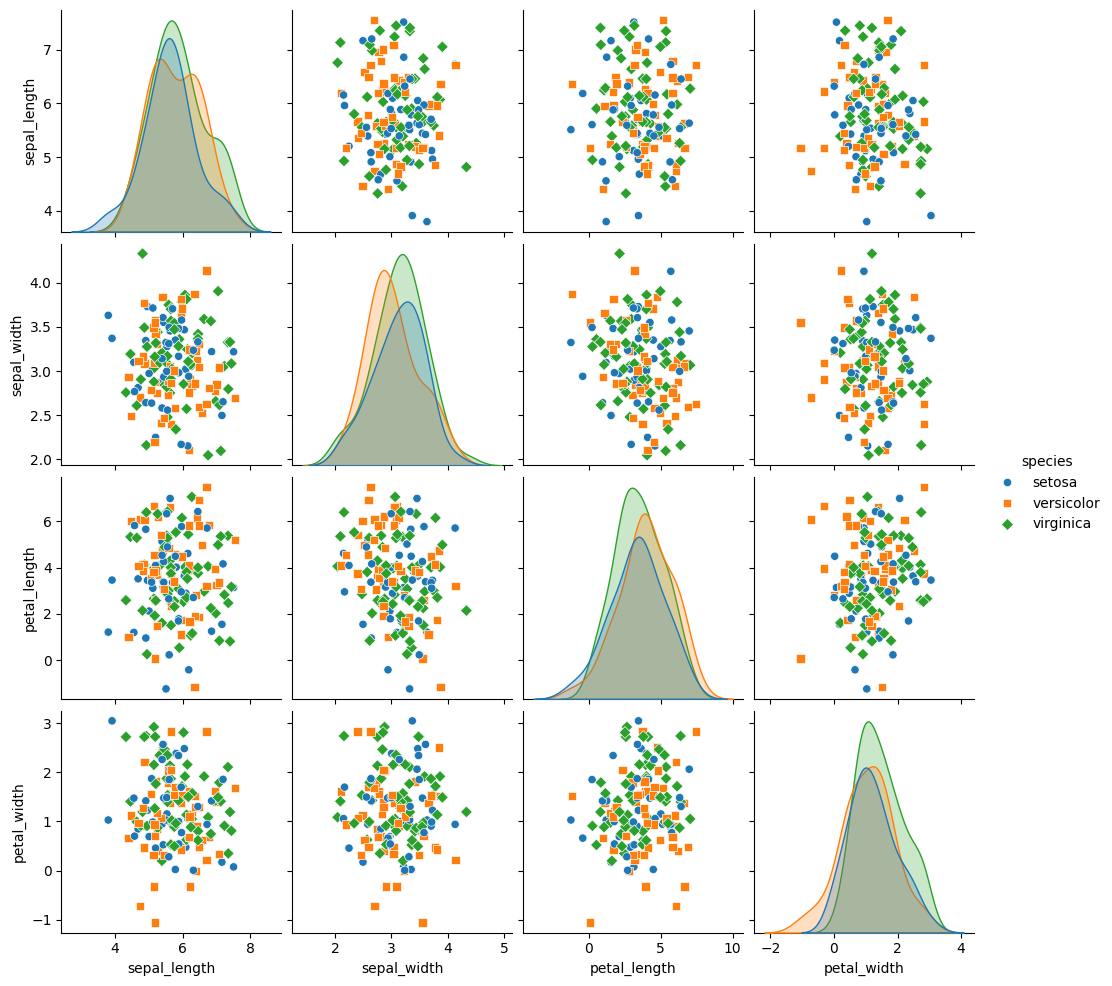

In [23]:
# Create pair plot
# Add species column separately to ensure proper assignment
df["species"] = np.random.choice(["setosa", "versicolor", "virginica"], 150)

# Ensure 'species' column exists
if "species" not in df.columns:
    print("Warning: 'species' column is missing from DataFrame")

# Create pair plot
sns.pairplot(df, hue="species", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

### Discussion 

Iris dataset. It begins by adding a 'species' column to the DataFrame using ``NumPy's random.choice`` function, assigning each data point randomly to one of three iris species: setosa, versicolor, or virginica. This step ensures that each data point is labeled for the visualization. The code then verifies the existence of the 'species' column to prevent errors during plotting. Using ``Seaborn's pairplot`` function, it creates a matrix of scatter plots for each pair of numerical features with points colored according to  species. The diagonal of this matrix displays kernel density estimates (KDE) to show the distribution of individual features. This visualization aids in understanding the pairwise relationships and distributions within the dataset.

### References

https://pytutorial.com/python-seaborn-pairplot-visualize-data-relationships/

https://www.analyticsvidhya.com/blog/2024/02/pair-plots-in-machine-learning/

https://seaborn.pydata.org/generated/seaborn.pairplot.html

https://sparkbyexamples.com/pandas/pandas-check-if-a-column-exists-in-dataframe/

https://stackoverflow.com/questions/69420468/python-how-to-check-presence-of-a-column-in-dataframe-by-its-name-or-number

https://stackoverflow.com/questions/54805838/is-there-a-point-in-checking-if-a-column-exists-in-a-pandas-df

### Data Visualization – Violin plot

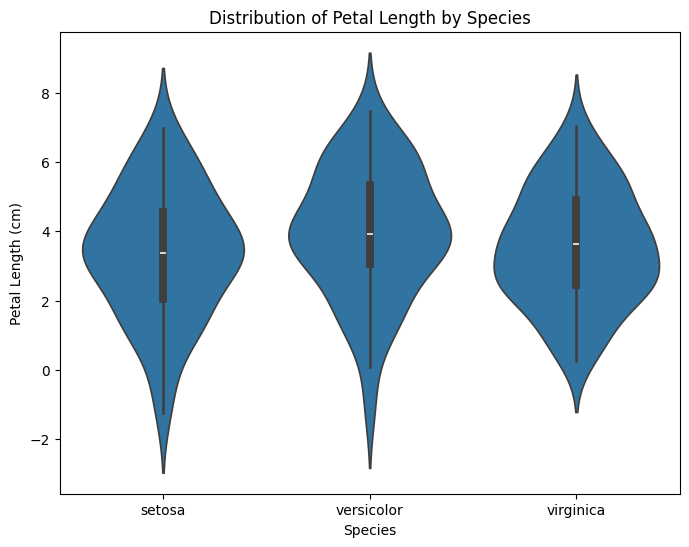

In [24]:
# Create violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='species', y='petal_length', data=df)# add x and y axis

# Add title and labels
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

# Show plot
plt.show()

### Discussion

A violin plot is a type of chart that shows the spread and shape of data. It combines a box plot with a smooth curve that shows how the data is spread out. This curve is mirrored on both sides, making the plot look like a violin. Violin plots are helpful when you want to compare how a certain measurement differs between groups. In the Iris flower dataset the violin plot was created using the libraries ``Seaborn`` and ``Matplotlib`` . This shows how petal length changes between different types of flowers.

### References

https://dataforvisualization.com/chart/violin-plot

https://www.geeksforgeeks.org/violin-plot-for-data-analysis/

https://www.youtube.com/watch?v=ktZH1OUvD4o
